In [3]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
a =pd.Series([1,3,5,np.nan,6,8])
print(a)

dates = pd.date_range("20200511", periods=5)
print(dates)
df = pd.DataFrame(np.random.rand(5,4), index=dates, columns=list("ABCD"))
print(df)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64
DatetimeIndex(['2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
               '2020-05-15'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2020-05-11  0.888550  0.662065  0.121629  0.189827
2020-05-12  0.027562  0.494652  0.787733  0.940082
2020-05-13  0.881122  0.305279  0.016420  0.669928
2020-05-14  0.581159  0.815530  0.593744  0.103247
2020-05-15  0.041329  0.503392  0.830969  0.270495


In [4]:
m_df = pd.read_csv("IMDB.csv")
temp_df = m_df.append(m_df)
temp_df.shape
#keep default to first. Keep value can be first, last, False
temp_df1 = temp_df.drop_duplicates()
temp_df1.shape
#Keep to False --- will drop all duplicate rows
temp_df2 = temp_df.drop_duplicates(keep=False)
temp_df2.shape
#play with columns of m_df
m_df.columns
m_df.rename(columns={'Runtime (Minutes)':'Runtime','Revenue (Millions)':'Revenue_Millions'}, inplace=True)
m_df.columns
m_df.columns= [col.lower() for col in m_df.columns]
m_df.head(1)
m_df.set_index('title', inplace=True)
m_df.head(1)

#work with null values (null,np.nan)

#null values in each column
m_df.isnull().sum()

#total null values in the df
print("Total null values in DF: ",m_df.isnull().sum().sum())

#filling all null and na values with their mean values
m_df['revenue_millions'].fillna(m_df['revenue_millions'].mean(), inplace=True)
m_df['metascore'].fillna(m_df['metascore'].mean(),inplace=True)

print("total null Values after DF imputation: ", m_df.isnull().sum().sum())


(2000, 12)

(1000, 12)

(0, 12)

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

,rank,title,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0


rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

Total null values in DF:  192
total null Values after DF imputation:  0


In [13]:
df = m_df
#slicing based on condition
ridly = df[df['director']=='Ridley Scott'][['rank','revenue_millions']]
ridly
best_rated = df[df['rating']>8.5][['rank','rating','revenue_millions']]
best_rated

all_nolan_scifi = df[((df['director']=='Christopher Nolan'))&(df['genre'].str.contains(pat='sci-fi',case=False))]
all_nolan_scifi
all_nolan_non_scifi = df[((df['director']=='Christopher Nolan'))&(~df['genre'].str.contains(pat='sci-fi',case=False))]
all_nolan_non_scifi

#most number of times for a directors
df['director'].value_counts().head(15)

#
df.groupby('director',as_index=False)['revenue_millions'].sum().sort_values('revenue_millions',ascending=False)


,rank,revenue_millions
title,,
Prometheus,2,126.46
The Martian,103,228.43
Robin Hood,388,105.22
American Gangster,471,130.13
Exodus: Gods and Kings,517,65.01
The Counselor,522,16.97
A Good Year,531,7.46
Body of Lies,738,39.38


,rank,rating,revenue_millions
title,,,
Interstellar,37,8.6,187.99
The Dark Knight,55,9.0,533.32
Inception,81,8.8,292.57
Kimi no na wa,97,8.6,4.68
Dangal,118,8.8,11.15
The Intouchables,250,8.6,13.18


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Prestige,65,"Drama,Mystery,Sci-Fi",Two stage magicians engage in competitive one-...,Christopher Nolan,"Christian Bale, Hugh Jackman, Scarlett Johanss...",2006,130,8.5,913152,53.08,66.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
The Dark Knight Rises,125,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0


Ridley Scott          8
Paul W.S. Anderson    6
M. Night Shyamalan    6
David Yates           6
Michael Bay           6
J.J. Abrams           5
Woody Allen           5
Zack Snyder           5
Justin Lin            5
Peter Berg            5
David Fincher         5
Denis Villeneuve      5
Christopher Nolan     5
Danny Boyle           5
Martin Scorsese       5
Name: director, dtype: int64

,director,revenue_millions
252,J.J. Abrams,1683.45
155,David Yates,1630.51
108,Christopher Nolan,1515.09
422,Michael Bay,1421.32
195,Francis Lawrence,1299.81
...,...,...
479,Patricia Rozema,0.01
501,Phillip Guzman,0.01
529,Robin Swicord,0.01
573,So Yong Kim,0.01


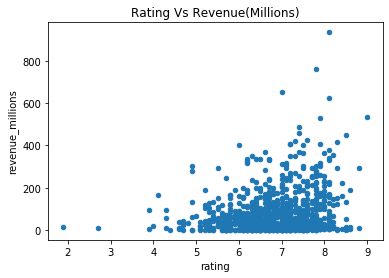

In [76]:
df.plot(kind='scatter',x='rating',y='revenue_millions',title="Rating Vs Revenue(Millions)");

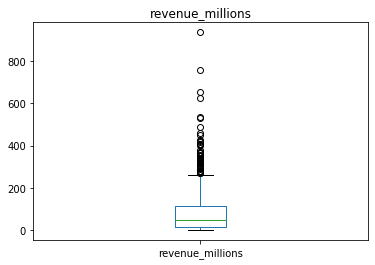

In [90]:
df['revenue_millions'].plot(kind='box',title='revenue_millions');

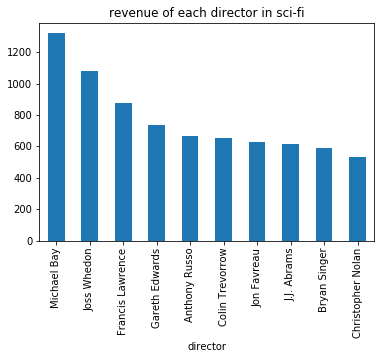

In [190]:
#revenue generated by top directors with their sci-fi films
df[df['genre'].str.contains('sci-fi',case=False)].groupby('director')['revenue_millions'].sum().sort_values(ascending=False).head(10).plot(kind='bar',x='director',y='revenue_millions',title='revenue of each director in sci-fi');

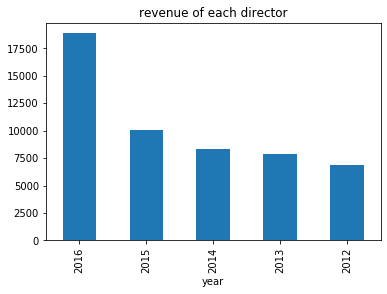

In [201]:
#top 5 revenue generated years
df.groupby('year')['revenue_millions'].sum().sort_values(ascending=False).head(5).plot(kind='bar',x='year',y='revenue_millions',title='revenue of each director');

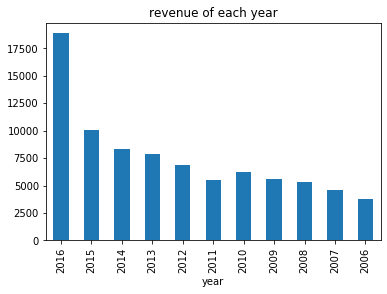

In [189]:
# Revenue of each year from latest year
df.groupby('year')['revenue_millions'].sum()[::-1].plot(kind='bar',x='year',y='revenue_millions',title='revenue of each year');

title
Star Wars: Episode VII - The Force Awakens    936.63
Avatar                                        760.51
Jurassic World                                652.18
Rogue One                                     532.17
Finding Dory                                  486.29
Avengers: Age of Ultron                       458.99
The Hunger Games: Catching Fire               424.65
Pirates of the Caribbean: Dead Man's Chest    423.03
Toy Story 3                                   414.98
Iron Man Three                                408.99
Name: revenue_millions, dtype: float64


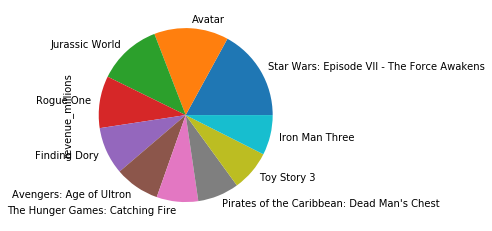

In [200]:
#revenue generated by top 10 Adventure movies
print(df[df['genre'].str.contains("adventure", case=False)].sort_values('revenue_millions',ascending=False).head(10)['revenue_millions'])
df[df['genre'].str.contains("adventure", case=False)].sort_values('revenue_millions',ascending=False).head(10).plot(kind='pie',y='revenue_millions');
plt.legend().remove();

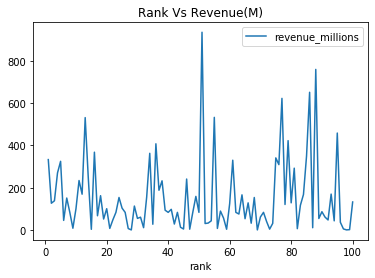

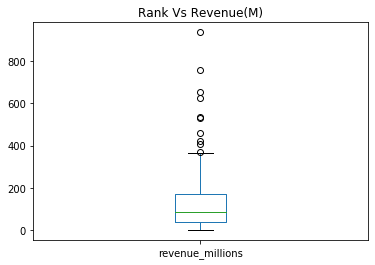

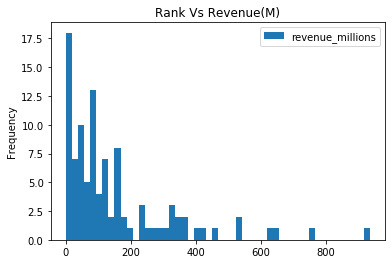

In [214]:
df[:100].plot(kind='line', x='rank',y='revenue_millions', title='Rank Vs Revenue(M)');
df[:100].plot(kind='box', x='rank',y='revenue_millions', title='Rank Vs Revenue(M)');
df[:100].plot(kind='hist', x='rank',y='revenue_millions', title='Rank Vs Revenue(M)',bins=50);
